# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [22]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [24]:
# Rename all the columns to lower case
df.columns = [col.lower() for col in df.columns]
df.columns


Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [25]:
# Change the index to 'linename'
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Reset the index: 

In [28]:
# Reset the index
df = df.reset_index()
df.head(2)

,level_0,index,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [36]:
for lines in df['linename']:
    print (len(lines))
    break

7


In [33]:
# Add a new 'num_lines' column
df['Num_lines'] = df['linename'].map(lambda x: len(x))

df.head(2)

,level_0,index,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_lines
0,0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7


Write a function to clean column names: 

In [37]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip()
    return cleaned

In [38]:
# Use the above function to clean the column names
df.columns = [clean(col) for col in df.columns]

In [39]:
# Check to ensure the column names were cleaned
df.columns

Index(['level_0', 'index', 'linename', 'c/a', 'unit', 'scp', 'station',
       'division', 'date', 'time', 'desc', 'entries', 'exits', 'Num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [52]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 

df['day_of_week'] = df['date'].dt.dayofweek

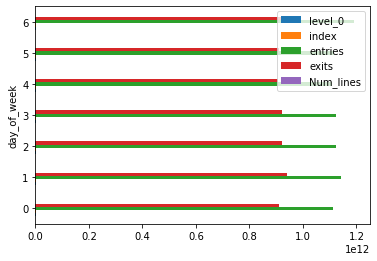

In [47]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [49]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
grouped.head()

,day_of_week,level_0,index,entries,exits,Num_lines
0,0,2783610827,2783610827,1114237052454,911938153513,76110
1,1,2833413973,2833413973,1143313287046,942230721477,77303
2,2,2781528032,2781528032,1123655222441,920630864687,75713
3,3,2817391725,2817391725,1122723988662,920691927110,76607
4,4,2778112001,2778112001,1110224700078,906799065337,75573


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [63]:
weekday_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week'] = df['day_of_week'].map(weekday_map)
df.head()

,level_0,index,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_lines,day_of_week
0,0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,2,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,3,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,4,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday


In [67]:
df_3 = df.groupby('day_of_week')
df_3.head()

,level_0,index,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_lines,day_of_week
0,0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,2,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,3,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,4,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday
6,6,6,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,00:00:00,REGULAR,6736683,2283460,7,Sunday
7,7,7,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,04:00:00,REGULAR,6736696,2283461,7,Sunday
8,8,8,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,08:00:00,REGULAR,6736705,2283483,7,Sunday
9,9,9,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,12:00:00,REGULAR,6736746,2283524,7,Sunday
10,10,10,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,16:00:00,REGULAR,6736873,2283587,7,Sunday


In [68]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

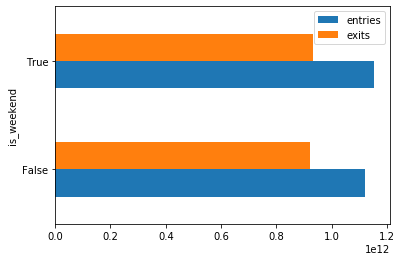

In [69]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').mean()
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [78]:
# Remove the 'c/a' and 'scp' columns


df.head(2)

,level_0,index,linename,unit,station,division,date,time,desc,entries,exits,Num_lines,day_of_week
0,0,0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,1,1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Summary

Great! You practiced your data cleanup skills using Pandas.